In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
path = '../Data/Processed/Processed.csv'
df = pd.read_csv(path, parse_dates = ['Last Update'])

In [3]:
df.head()

,Unnamed: 0,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,0,Washington,United States,2020-01-21,1.0,0.0,0.0,0.0
1,1,Shanghai,Mainland China,2020-01-21,9.0,10.0,0.0,0.0
2,2,Yunnan,Mainland China,2020-01-21,1.0,0.0,0.0,0.0
3,3,Beijing,Mainland China,2020-01-21,10.0,0.0,0.0,0.0
4,4,Taiwan,Taiwan,2020-01-21,1.0,0.0,0.0,0.0


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 7 columns):
Province/State    10745 non-null object
Country/Region    15710 non-null object
Last Update       15710 non-null datetime64[ns]
Confirmed         15710 non-null float64
Suspected         15710 non-null float64
Recovered         15710 non-null float64
Death             15710 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 859.3+ KB


In [5]:
df_Update = df.groupby(['Last Update']).sum().reset_index()

In [6]:
df_Update

,Last Update,Confirmed,Suspected,Recovered,Death
0,2020-01-21 00:00:00,332.0,169.0,0.0,0.0
1,2020-01-22 12:00:00,555.0,137.0,0.0,0.0
2,2020-01-23 12:00:00,653.0,144.0,30.0,18.0
3,2020-01-24 00:00:00,881.0,127.0,34.0,26.0
4,2020-01-24 12:00:00,939.0,171.0,36.0,26.0
...,...,...,...,...,...
202,2020-02-05 15:33:00,24634.0,3.0,1010.0,494.0
203,2020-02-05 15:43:00,24636.0,3.0,1010.0,494.0
204,2020-02-05 16:23:00,24641.0,3.0,1012.0,494.0
205,2020-02-05 16:33:00,24645.0,3.0,1012.0,494.0


C:\Users\sadmin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


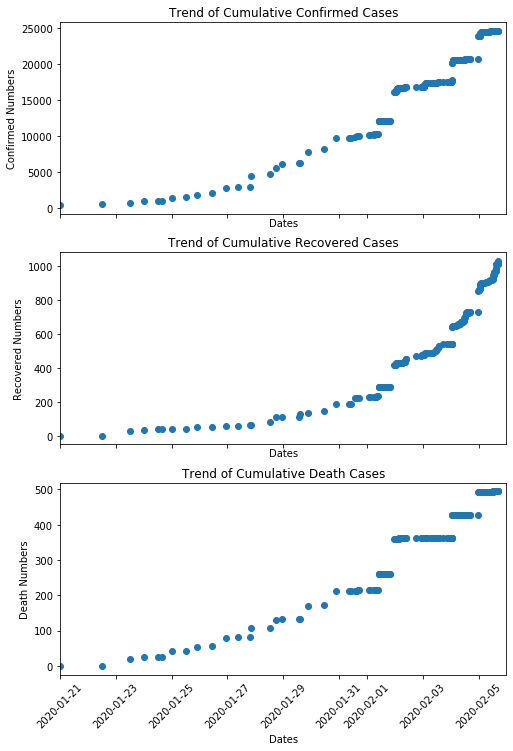

In [7]:
#General trend

conditions = ['Confirmed', 'Recovered', 'Death']

fig, axes = plt.subplots(3, figsize = (8,12), sharex = True)
for indx, col in enumerate(conditions):
    axes[indx].scatter(df_Update['Last Update'],df_Update[col])
    axes[indx].set_xlim(('2020-01-21', '2020-02-06'))
    axes[indx].set_title('Trend of Cumulative ' + col + ' Cases')
    axes[indx].set_ylabel(col + ' Numbers')
    axes[indx].set_xlabel('Dates')
    axes[indx].set_ylabel(col + ' Numbers')
    plt.xticks(rotation=45)

(737445.0, 737461.0)

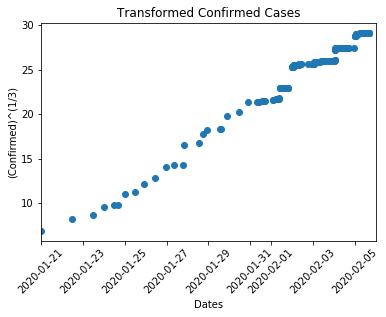

In [8]:
df_Update['Trans_Confirmed'] = df_Update['Confirmed'].apply(lambda x: np.power(x, 1/3))
plt.scatter(df_Update['Last Update'], df_Update['Trans_Confirmed'])
plt.xticks(rotation = 45)
plt.title('Transformed Confirmed Cases')
plt.xlabel('Dates')
plt.ylabel('(Confirmed)^(1/3)')
plt.xlim('2020-01-21', '2020-02-06')

In [9]:
i = 1
curr = df_Update['Last Update'][0]
def date_to_count(x):
    global curr, i 
    if curr.day != x.day or curr.month != x.month:
        curr = x
        i += 1
    return i + x.hour/24

df_Update['Day'] = df_Update['Last Update'].apply(date_to_count)

slope, intercept, r_value, p_value, stderr = stats.linregress(df_Update['Day'], df_Update['Trans_Confirmed'])

residual = (df_Update['Day']*slope + intercept) - df_Update['Trans_Confirmed']

,Slope,Intercept,r_value,p_value
0,1.547252,3.823868,0.986921,1.837139e-164


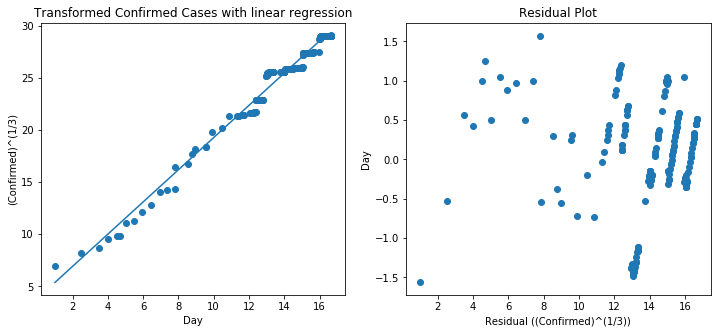

In [10]:
days = np.arange(1,17)
linear = slope*days +intercept


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

ax1.scatter(df_Update['Day'], df_Update['Trans_Confirmed'])
ax1.plot(days, linear)
ax1.set_title('Transformed Confirmed Cases with linear regression')
ax1.set_xlabel('Day')
ax1.set_ylabel('(Confirmed)^(1/3)')

ax2.scatter(df_Update['Day'], residual)
ax2.set_title("Residual Plot")
ax2.set_xlabel('Residual ((Confirmed)^(1/3))')
ax2.set_ylabel('Day')

dictionary = {'Slope': [slope], 'Intercept': [intercept], 'r_value': [r_value], 'p_value': [p_value]}
pd.DataFrame(dictionary)

(737445.0, 737461.0)

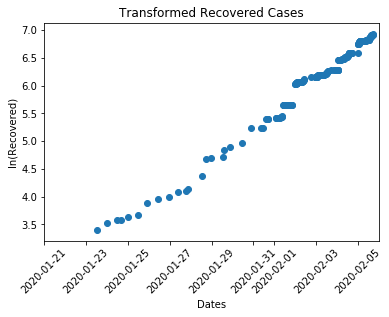

In [11]:
df_Update['Trans_Recovered'] = df_Update['Recovered'].apply(lambda x: np.log(x))
plt.scatter(df_Update['Last Update'], df_Update['Trans_Recovered'])
plt.xticks(rotation = 45)
plt.title('Transformed Recovered Cases')
plt.xlabel('Dates')
plt.ylabel('ln(Recovered)')
plt.xlim('2020-01-21', '2020-02-06')

,Slope,Intercept,r_value,p_value
0,0.286468,2.130611,0.990391,2.164619e-176


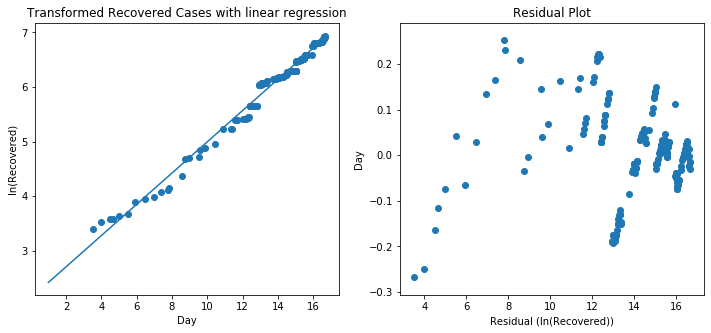

In [12]:
slope, intercept, r_value, p_value, stderr = stats.linregress(df_Update['Day'][2:], df_Update['Trans_Recovered'][2:])

residual = (df_Update['Day']*slope + intercept) - df_Update['Trans_Recovered']

linear = slope*days+intercept

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

ax1.scatter(df_Update['Day'], df_Update['Trans_Recovered'])
ax1.plot(days, linear)
ax1.set_title('Transformed Recovered Cases with linear regression')
ax1.set_xlabel('Day')
ax1.set_ylabel('ln(Recovered)')

ax2.scatter(df_Update['Day'], residual)
ax2.set_title("Residual Plot")
ax2.set_xlabel('Residual (ln(Recovered))')
ax2.set_ylabel('Day')

dictionary = {'Slope': [slope], 'Intercept': [intercept], 'r_value': [r_value], 'p_value': [p_value]}
pd.DataFrame(dictionary)

(737445.0, 737461.0)

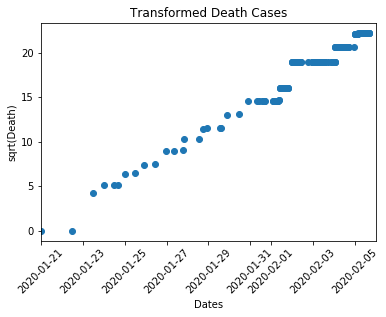

In [13]:
df_Update['Trans_Death'] = df_Update['Death'].apply(lambda x: np.power(x, 1/2))
plt.scatter(df_Update['Last Update'], df_Update['Trans_Death'])
plt.xticks(rotation = 45)
plt.title('Transformed Death Cases')
plt.xlabel('Dates')
plt.ylabel('sqrt(Death)')
plt.xlim('2020-01-21', '2020-02-06')

,Slope,Intercept,r_value,p_value
0,1.429758,-1.237832,0.977475,4.065563e-139


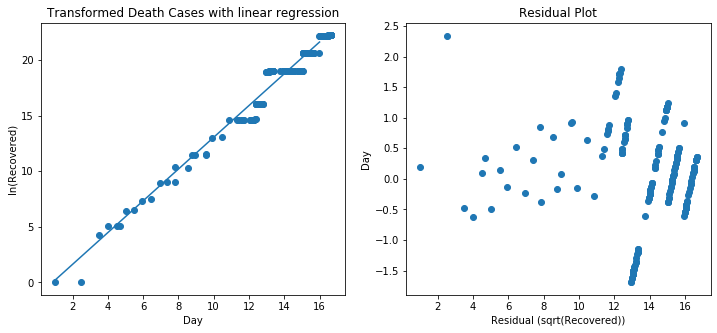

In [14]:
slope, intercept, r_value, p_value, stderr = stats.linregress(df_Update['Day'][2:], df_Update['Trans_Death'][2:])

residual = (df_Update['Day']*slope + intercept) - df_Update['Trans_Death']

linear = slope*days+intercept

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

ax1.scatter(df_Update['Day'], df_Update['Trans_Death'])
ax1.plot(days, linear)
ax1.set_title('Transformed Death Cases with linear regression')
ax1.set_xlabel('Day')
ax1.set_ylabel('ln(Recovered)')

ax2.scatter(df_Update['Day'], residual)
ax2.set_title("Residual Plot")
ax2.set_xlabel('Residual (sqrt(Recovered))')
ax2.set_ylabel('Day')

dictionary = {'Slope': [slope], 'Intercept': [intercept], 'r_value': [r_value], 'p_value': [p_value]}
pd.DataFrame(dictionary)

In [15]:
#set up to plot newly confirmed cases of coronavirus by day

df_Update['Last Update'] = df_Update['Last Update'].apply(lambda x: x.strftime("%Y-%m-%d"))

df_day = df_Update.groupby(['Last Update']).min().reset_index()

temp1 = df_day.Confirmed.values
temp2 = temp1[:]

temp1 = np.append(temp1, 0)
temp2 = np.insert(temp2, 0 , 0)
change = temp1-temp2

change[0] = np.nan
change = change[:-1]

df_day['Change'] = change

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

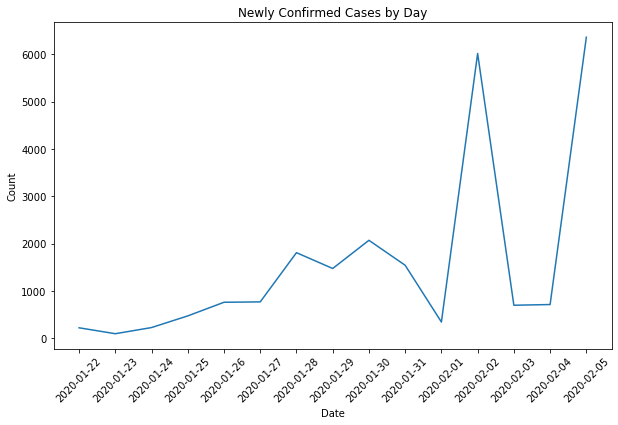

In [16]:
plt.figure(figsize = [10,6])
plt.plot(df_day['Last Update'][1:], df_day['Change'][1:])
plt.title('Newly Confirmed Cases by Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [17]:
last_timestamp = df['Last Update'].iloc[-1]

recent_data = df[df['Last Update'] == last_timestamp]

data_country = (recent_data.groupby(['Country/Region'])
                            .sum()
                            .reset_index()
                            .sort_values(by = 'Confirmed', ascending = True))

Text(0.5, 0, 'Counts')

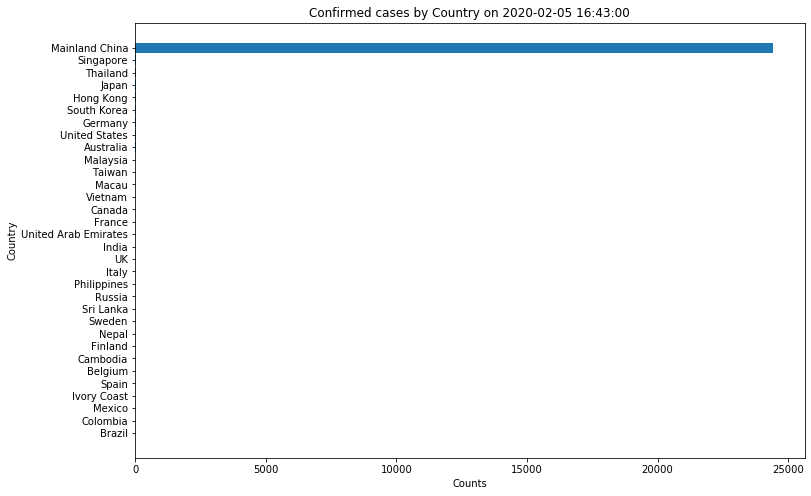

In [18]:
country = data_country['Country/Region'].values
confirmed = data_country['Confirmed'].values

plt.figure(figsize = [12,8])
plt.barh(country, confirmed)
plt.title('Confirmed cases by Country on {}'.format(last_timestamp))
plt.ylabel('Country')
plt.xlabel('Counts')

Text(0.5, 0, 'Counts')

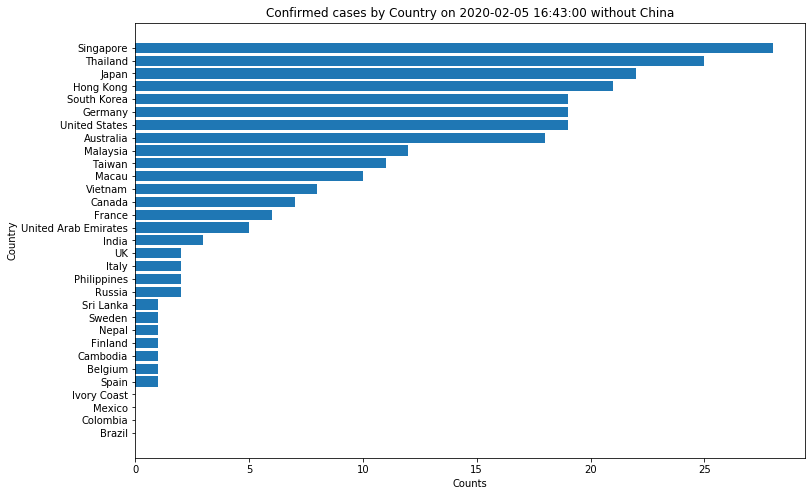

In [19]:
plt.figure(figsize = [12,8])
plt.barh(country[:-1], confirmed[:-1])
plt.title('Confirmed cases by Country on {} without China'.format(last_timestamp) )
plt.ylabel('Country')
plt.xlabel('Counts')